<a href="https://colab.research.google.com/github/zeliemarcais/Workshop-EO/blob/main/Workshop_EO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1: Introduction into Earth Observation data processing



This session will start with the discussion of geospatial data types available via earth observations, modelling, and crowdsourcing, as well as ways to process them for capturing of environmental and economic changes.

**Google Earth Engine Platform**


a cloud-based platform for analyzing geospatial data. It enables users to:

*   Access and analyze vast amounts of satellite imagery and other Earth observation data.
*   Perform large-scale data processing for environmental monitoring, climate change, deforestation, land use, and disaster management.
*   Utilize a wide array of pre-built datasets, algorithms, and machine learning tools for remote sensing and geographic analysis.
*   Run computations in parallel using Google's cloud infrastructure, making it efficient for large-scale geospatial projects.

**Visualization of the data extraction process from Google Earth Engine:**

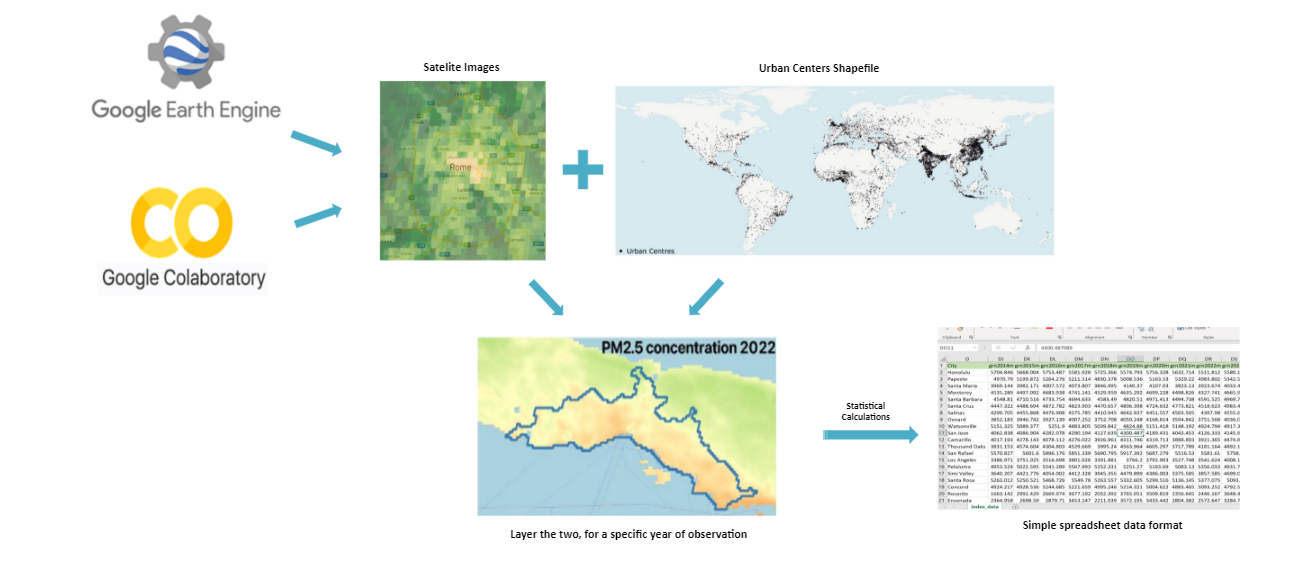

**Geospatial Data Nature and Structure**

Typically, Geospatial data is stored in two ways;

**Vector Format** : data is stored as points, lines and polygons with X and Y coordinates

**Raster Fromat** : a grid of cells (the location of the cell providing geographic location information) storing values observed



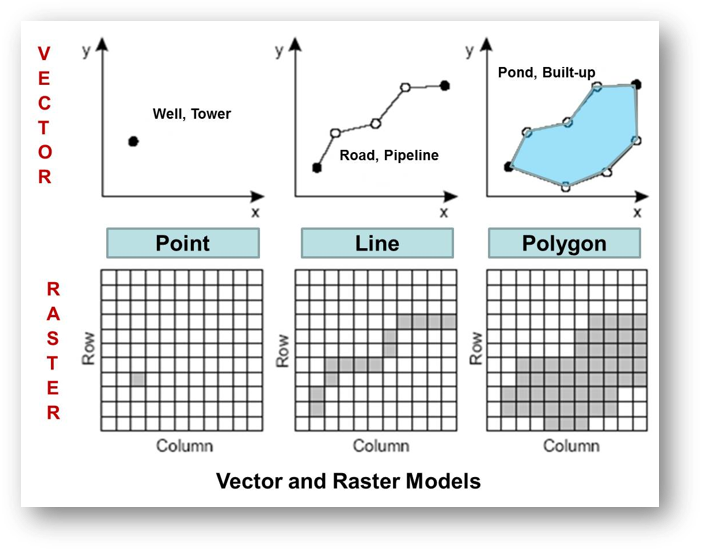

First, we have to set up the environment. This includes loading the required packages to work with geo-spatial data, and authenticate access of this Google Colab Notebook to Google Earth Engine.


We need to connect to a Google Cloud project that has enabled the Google Earth Engine API within it.

If you would like to learn to set this up yoursef, instructions can be found here : https://developers.google.com/earth-engine/cloud/earthengine_cloud_project_setup

Then,

In [1]:
#import neccesary packages
import pandas as pd
import geopandas as gpd
import ee
import geemap
import geopy
from geopy.geocoders import OpenCage
import bokeh.palettes as palettes

In [2]:
#authenticate google - for earth engine API
ee.Authenticate()
ee.Initialize(project='ees-workshop') # others can use this project if shared as 'editor'

#and to allow colab to access google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Next, we need to load the files for our analysis. First, we will import a *shapefile* of city shapes, and then the time-series geo-spatial data.

**A) Introduction to the Global Human Settlement Layer**

The GHSL project produces new, global, spatial information, evidence-based analytics and knowlege describing the human presence on the planet based mainly on two quantitative factors: i) the spatial distribution (density) of built -up structures, and ii) the spatial distribution (density) of resident population. Both factors are observed in the long-term temporal domain and per uniform surface units in order to support trends and indicators for monitoring the implementation of international framework agreements.

The Urban Centre Database describes several dimension of the delineated urban space: general characteristics, multitemporal Urban Centre domain, geography, environment, socio-economy, disaster risk reduction, and sustainable development goals. Urban Centre Database describes more than 10,000 Urban Centres delineated and uniquely identified from the GHS-SMOD grid of epoch 2015.

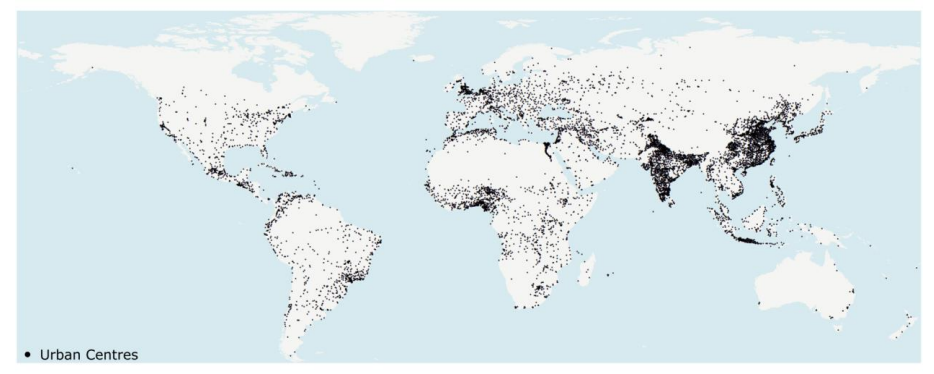

The “Urban Centres” (UC) using the Degree of Urbanisation are defined as: “high-density clusters of contiguous grid cells of 1 km2 with a density of at least 1500 inhabitants per km2 and a minimum population of 50000” (Dijkstra & Poelman, 2014) (Figure 7). The UC as implemented in the current GHSL settlement model (SMOD) formulation is defined as: “the spatially-generalized high-density clusters of contiguous grid cells of 1 km2 with a density of at least 1,500 inhabitants per km2 of land surface or at least 50% built -up surface share per km2 of land surface, and a minimum population of 50,000.”

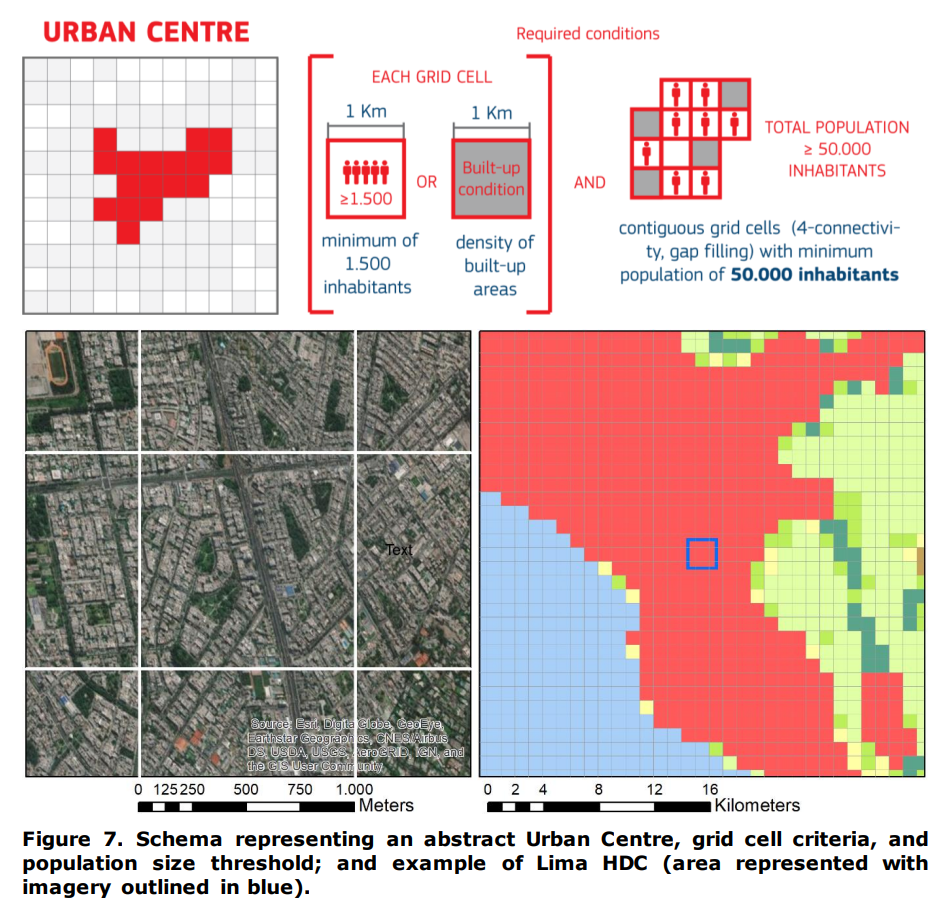

In [3]:
#import the urban center file.
uc = gpd.read_file('/content/gdrive/MyDrive/EES Workshop/uc_data/uc.gpkg')

#keep only relevant variables: city shape, id number, city name, country, region and population
uc = uc[['geometry', 'ID_HDC_G0', 'UC_NM_MN', 'CTR_MN_NM', 'GRGN_L1', 'P15']]

We will be looking only at the European continent, and cities with more than 650,000 residents. We also exclude Russia to limit the width of the map.
Let's filter our sample for this:

In [4]:
uc_europe = uc[uc['GRGN_L1'] == 'Europe']
uc_europe = uc_europe[uc_europe['P15'] >= 650000]
uc_europe = uc_europe[uc_europe['CTR_MN_NM'] != 'Russia']
uc_europe

,geometry,ID_HDC_G0,UC_NM_MN,CTR_MN_NM,GRGN_L1,P15
1550,"MULTIPOLYGON (((-9.05966 38.90819, -9.03634 38...",1551.0,Lisbon,Portugal,Europe,1.958521e+06
1568,"MULTIPOLYGON (((-8.73513 41.28033, -8.72322 41...",1569.0,Porto,Portugal,Europe,9.982835e+05
1631,"MULTIPOLYGON (((-6.04512 37.44623, -6.03361 37...",1632.0,Seville,Spain,Europe,8.610426e+05
1655,"MULTIPOLYGON (((-6.16479 53.42221, -6.15099 53...",1656.0,Dublin,Ireland,Europe,1.004263e+06
1676,"MULTIPOLYGON (((-4.43094 36.75887, -4.41949 36...",1677.0,Málaga,Spain,Europe,7.999966e+05
...,...,...,...,...,...,...
3580,"MULTIPOLYGON (((30.78499 46.60085, 30.8102 46....",3581.0,Odesa,Ukraine,Europe,1.117970e+06
3753,"MULTIPOLYGON (((34.92713 48.56141, 34.94004 48...",3754.0,Dnipro,Ukraine,Europe,9.032052e+05
3768,"MULTIPOLYGON (((35.16076 47.91112, 35.17356 47...",3769.0,Zaporizhzhia,Ukraine,Europe,7.281451e+05
3780,"MULTIPOLYGON (((36.18827 50.07191, 36.22775 50...",3781.0,Kharkiv,Ukraine,Europe,1.430661e+06


Now we can plot a sample of cities over OpenStreetMap using Google Earth Engine

In [5]:
# Initialise the map
Map = geemap.Map()

# Covert the dataframe to EE FeatureCollection and add it to the map
Map.addLayer(geemap.geopandas_to_ee(uc_europe[['geometry']]), {}, 'Urban Centers')

# Center the map on Europe and set the zoom level
Map.setCenter(10, 50, 4)

# Display the map
Map

Map(center=[50, 10], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(chil…

**B) Collect Satelitte Data : NDVI, or Greenness - Biodiversity Indicators from Google Earth Engine**

As we have seen in session 1 of this workshop, NDVI stands for Normalized Difference Vegetation Index, which is a mathematical calculation that measures the health of vegetation. It's a remote sensing index that's used to assess the density and greenness of vegetation in satellite images. NDVI is calculated by measuring the difference between the amount of near-infrared (NIR) light reflected by vegetation and the amount of red light absorbed by vegetation.

Google Earth Engine Source : https://developers.google.com/earth-engine/datasets/catalog/MODIS_061_MOD13A2

Earth Engine Console: https://code.earthengine.google.com/?scriptPath=Examples:Datasets/MODIS/MODIS_061_MOD13A2

Example Map of NDVI in a City:

In [13]:
#FUNCTION TO PLOT A CITY-LEVEL EARTH ENGINE COLLECTION
import bokeh.palettes
import bokeh.palettes as palettes
from geopy.geocoders import OpenCage


def plot_city_map(city_name,
                  image_collection, band, start_date, end_date, pixel_stat,
                  min, max, palette,
                  size = .25, zoom = 10, layer_name = None):

    # Geocode city
    geocoder = OpenCage('09943767fd1340409a0001c4d2c6db35')
    location = geocoder.geocode(city_name)

    # Define the bounding box around the city as +/- .25 degrees around its centre
    lat, lon = (location.latitude, location.longitude)
    bbox = [lon-size, lat-size, lon+size, lat+size]

    # Import requested ImageCollection and filter it within the bounding box and date range
    raster_annual = ee.ImageCollection(image_collection) \
        .select(band) \
        .filterDate(start_date, end_date) \
        .reduce(pixel_stat) \
        .clip(ee.Geometry.Rectangle(bbox))

    # Visualization parameters
    vis_params = {
        'min': min,
        'max': max,
        'palette': palette
    }

    # Add the layer to the OSM map
    Map = geemap.Map()
    Map.addLayer(raster_annual, vis_params, layer_name)
    Map.setCenter(lon, lat, zoom)

    # Display the map
    return(Map)

In [14]:
plot_city_map(city_name = 'London, United Kingdom',
              image_collection = 'MODIS/061/MOD13A2', band = 'NDVI',
              start_date = '2020-01-01', end_date = '2020-12-31',
              pixel_stat = 'max',
              min = 0, max = 10000,
              palette = bokeh.palettes.YlGn9[::-1])   # resorting palette

Map(center=[51.4893335, -0.1440551], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=Se…

Next, we want to extract the pixel-level data of this indicators (NDVI), for a city. To do so, we first have to get yearly values (mean values of pixels accross all satelite images within a year), followed by spatial values (mean pixel values of the yearly image within each city. )

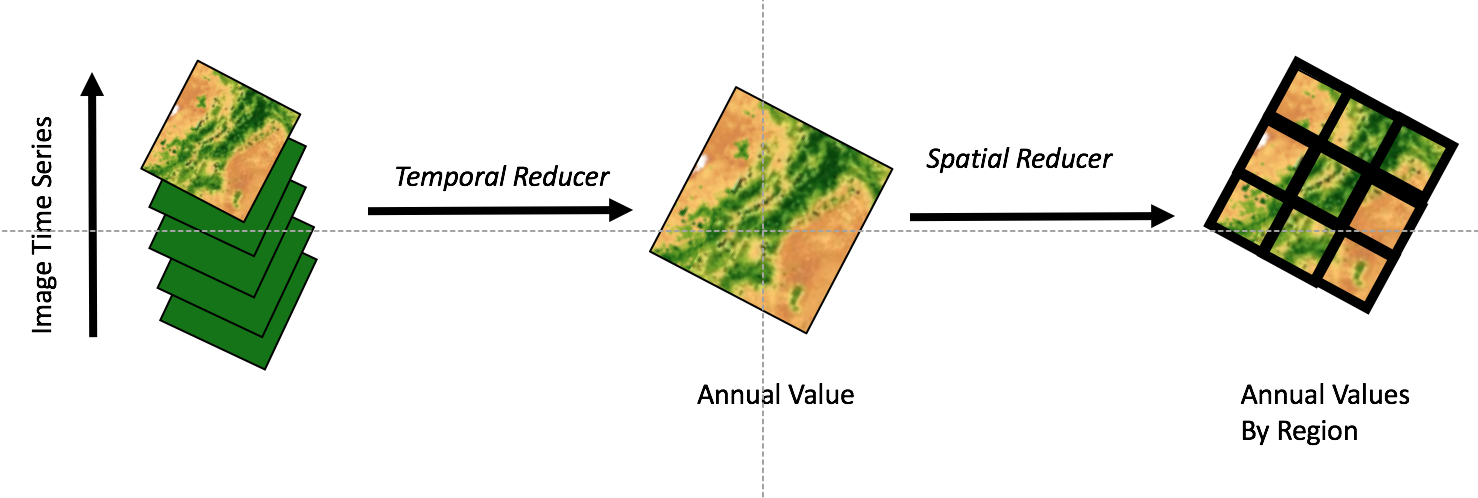

In [15]:
# General function to extract city data for all types of GEE data
def extract_uc_stat(uc,
                    start_year, end_year,
                    image_collection, band, scale,
                    pixel_stat, city_stat):

    # Convert urban center shapefile to FeatureCollection, including id, city name, and geometry
    uc_ee = geemap.geopandas_to_ee(uc[['ID_HDC_G0', 'UC_NM_MN', 'geometry']])

    # Prepare resulting empty dataframe
    result_all = pd.DataFrame()

    for year in range(start_year, end_year + 1):

        # Filter the collection by date, select the desired band, and calculate the pixel statistics over the year
        raster_annual = ee.ImageCollection(image_collection) \
            .select(band) \
            .filterDate(f'{year}-01-01', f'{year}-12-31') \
            .reduce(pixel_stat)                            #temporal reducer

        # Calculate statistics for each Urban Centre
        uc_stat = raster_annual.reduceRegions(
            collection = uc_ee,
            reducer = getattr(ee.Reducer, city_stat)(),     #spatial reducer
            scale = scale,
            crs = 'EPSG:4326'
        )

        # Convert the resulting statistics into a dataframe
        result_annual = geemap.ee_to_df(uc_stat)

        # Rename to keep year info in column names
        result_annual = result_annual.rename(columns={city_stat: f'{band}_{year}'})

        # Merge the result with the overall result_all dataframe, including city names
        if result_all.empty:
            result_all = result_annual
        else:
            result_all = pd.merge(result_all, result_annual, on=['ID_HDC_G0', 'UC_NM_MN'], how='outer')

    # Print results
    return result_all

In [16]:
# Extract raw NDVI city data for 2018
greenness_2018 = extract_uc_stat(uc_europe, 2018, 2018, 'MODIS/061/MOD13A2', 'NDVI', scale=1000, pixel_stat='max', city_stat='mean')
greenness_2018

,ID_HDC_G0,UC_NM_MN,NDVI_2018
0,1551,Lisbon,4994.033598
1,1569,Porto,5584.480694
2,1632,Seville,4577.252852
3,1656,Dublin,6235.226116
4,1677,Málaga,4492.145098
...,...,...,...
61,3581,Odesa,5164.741946
62,3754,Dnipro,5582.822166
63,3769,Zaporizhzhia,5444.872223
64,3781,Kharkiv,6006.824203


**C) Creating an Index from results**

As you can see, we have successfully extracted the average NDVI raw data for each city in our sample. However, it is difficult to make sense of the score, as not all are familiar with the scale of the unit of observation. For this reason, we will use the scores to create an Index, ranking the cities from 0 to 100 based on their raw scores. To do this, we will use the OECD (2008) guide for constructing composite indicators;



*   Theoretical Framework: Provide the basis for the selection and combination of indicators into a meaningful composite indicator under a fitness-for purpose principle.
*   Data Selection: based on analytical soundness, measurability, country coverage, and relevance to the phenomenon being measured (including the use of proxies).

*   Imputation of missing data and dealing with extremes

*   Normalisation: to render indicators comparable. Attention needs to be paid to extreme values and skewed data.

*   Robustness and sensitivity assessments.

In [17]:
from sklearn.preprocessing import MinMaxScaler

#Write Function to create Indexes
def index(input_df, value_columns, fill_value=0):

    # Fill missing values in the specified columns
    for col in value_columns:
        input_df[col] = input_df[col].fillna(fill_value)

    # Initialize the MinMaxScaler with the specified range
    scaler = MinMaxScaler(feature_range=(0, 100))

    # Apply MinMax scaling to the specified columns
    input_df[value_columns] = scaler.fit_transform(input_df[value_columns])

    # Convert the normalized values to integers
    input_df[value_columns] = input_df[value_columns].astype(int)

    return input_df

In [18]:
# Index Greenness
value_columns = ['NDVI_2018']

# Process and normalize the Greenness data
index_ndvi = index(greenness_2018, value_columns)
index_ndvi

,ID_HDC_G0,UC_NM_MN,NDVI_2018
0,1551,Lisbon,41
1,1569,Porto,60
2,1632,Seville,28
3,1656,Dublin,80
4,1677,Málaga,25
...,...,...,...
61,3581,Odesa,46
62,3754,Dnipro,60
63,3769,Zaporizhzhia,55
64,3781,Kharkiv,73


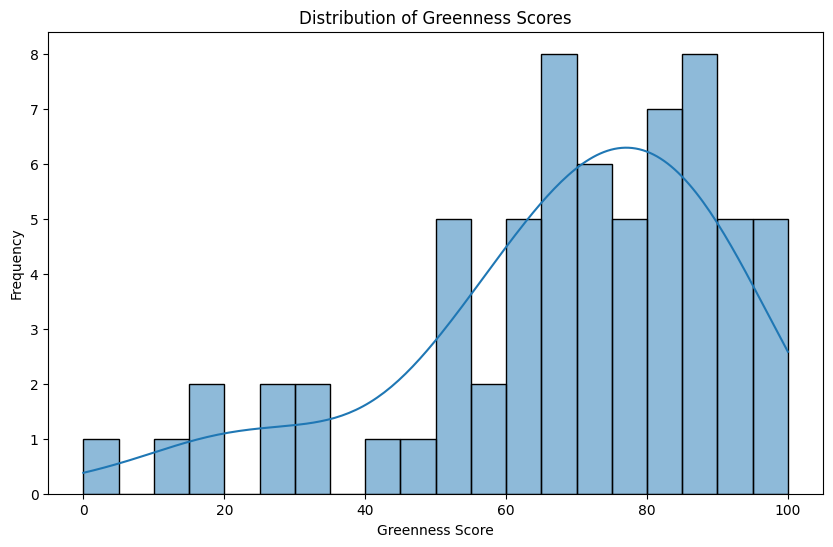

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

#Visualize
plt.figure(figsize=(10, 6))
sns.histplot(index_ndvi['NDVI_2018'], bins=20, kde=True)
plt.title('Distribution of Greenness Scores')
plt.xlabel('Greenness Score')
plt.ylabel('Frequency')
plt.show()

#2: Observations over time - Monitoring performance

Next, we will use time-series data to monitor performance over time, in Europe. To do so, we will create multiple indices for a series of urban sustainability indicators, over multiple years by calling on the function to extract raw values from Google Earth Engine and then Indexing the results.

**A.) Extract data for all years for all indicators**

Greenness data:  https://developers.google.com/earth-engine/datasets/catalog/MODIS_061_MOD13A2

In [20]:
# extract greenness
greenness_data = extract_uc_stat(uc_europe, 2018, 2024, 'MODIS/061/MOD13A2', 'NDVI', scale=1000, pixel_stat='max', city_stat='mean')

Nighttime Light Data: https://developers.google.com/earth-engine/datasets/catalog/NOAA_VIIRS_DNB_MONTHLY_V1_VCMSLCFG

In [21]:
#extract nighttime lights
ntl_data = extract_uc_stat(uc_europe, 2018, 2023, 'NOAA/VIIRS/DNB/MONTHLY_V1/VCMCFG', 'avg_rad', scale=463.83, pixel_stat='mean', city_stat='sum')

NO2 Data: https://developers.google.com/earth-engine/datasets/catalog/COPERNICUS_S5P_OFFL_L3_NO2

In [22]:
#extract no2 ! LONG TO RUN (c.22 min)
#no2_data = extract_uc_stat(uc_europe, 2018, 2023, 'COPERNICUS/S5P/OFFL/L3_NO2', 'tropospheric_NO2_column_number_density', scale=1113.2, pixel_stat='mean', city_stat='mean')

#the data has been preloaded, as the above line can take 30+ mins to run
no2_data = pd.read_csv('/content/gdrive/MyDrive/EES Workshop/no2_data.csv')

**Note - Scale**

The level of detail (of features/phenomena) represented by a raster is often dependent on the cell (pixel) size, or spatial resolution, of the raster. The cell must be small enough to capture the required detail but large enough so computer storage and analysis can be performed efficiently. More features, smaller features, or a greater detail in the extents of features can be represented by a raster with a smaller cell size.


**Note - Projection**

The projection, or coordinate reference system (CRS), of geospatial data is a way to represent the Earth's surface on a flat surface, such as a computer screen or map. The projection is important because it determines how the map relates to the real world.


**B. Calculate Index for all indicators**

In [23]:
# Index Greenness
value_columns_green = ['NDVI_2018', 'NDVI_2019', 'NDVI_2020', 'NDVI_2021', 'NDVI_2022', 'NDVI_2023']

# Process and normalize the Greenness data
index_ndvi = index(greenness_data, value_columns_green)
index_ndvi

,ID_HDC_G0,UC_NM_MN,NDVI_2018,NDVI_2019,NDVI_2020,NDVI_2021,NDVI_2022,NDVI_2023,NDVI_2024
0,1551,Lisbon,41,39,45,38,46,46,5432.655689
1,1569,Porto,60,51,60,55,51,58,5691.758537
2,1632,Seville,28,20,37,28,22,24,5125.585152
3,1656,Dublin,80,80,85,83,76,82,6590.182099
4,1677,Málaga,25,12,17,15,0,9,4233.806195
...,...,...,...,...,...,...,...,...,...
61,3581,Odesa,46,39,36,54,38,45,5335.493294
62,3754,Dnipro,60,58,59,61,51,64,5608.339406
63,3769,Zaporizhzhia,55,61,60,68,55,67,5642.629091
64,3781,Kharkiv,73,66,67,66,65,71,5982.975349


In [24]:
# Index NTLs
value_columns_ntl = ['avg_rad_2018', 'avg_rad_2019', 'avg_rad_2020', 'avg_rad_2021', 'avg_rad_2022', 'avg_rad_2023']

# Process and normalize the NTL data
index_ntl = index(ntl_data, value_columns_ntl)
index_ntl

,ID_HDC_G0,UC_NM_MN,avg_rad_2018,avg_rad_2019,avg_rad_2020,avg_rad_2021,avg_rad_2022,avg_rad_2023
0,1551,Lisbon,33,35,39,37,43,50
1,1569,Porto,16,16,15,14,19,23
2,1632,Seville,12,14,15,12,17,23
3,1656,Dublin,7,8,9,6,13,18
4,1677,Málaga,11,13,13,13,17,24
...,...,...,...,...,...,...,...,...
61,3581,Odesa,3,3,3,3,4,1
62,3754,Dnipro,3,4,3,7,2,0
63,3769,Zaporizhzhia,0,0,0,0,0,0
64,3781,Kharkiv,5,1,2,3,1,0


In [25]:
# Index NO2
value_columns_no2 = ['tropospheric_NO2_column_number_density_2018', 'tropospheric_NO2_column_number_density_2019', 'tropospheric_NO2_column_number_density_2020', 'tropospheric_NO2_column_number_density_2021', 'tropospheric_NO2_column_number_density_2022', 'tropospheric_NO2_column_number_density_2023']

# Process and normalize the NO2 data
index_no2 = index(no2_data, value_columns_no2)
index_no2

,Unnamed: 0,ID_HDC_G0,UC_NM_MN,tropospheric_NO2_column_number_density_2018,tropospheric_NO2_column_number_density_2019,tropospheric_NO2_column_number_density_2020,tropospheric_NO2_column_number_density_2021,tropospheric_NO2_column_number_density_2022,tropospheric_NO2_column_number_density_2023
0,0,1551,Lisbon,33,22,26,22,24,37
1,1,1569,Porto,27,23,25,24,25,30
2,2,1632,Seville,23,22,24,21,19,30
3,3,1656,Dublin,11,11,9,10,12,13
4,4,1677,Málaga,11,9,12,8,10,16
...,...,...,...,...,...,...,...,...,...
61,61,3581,Odesa,9,7,13,10,5,8
62,62,3754,Dnipro,20,15,21,18,11,18
63,63,3769,Zaporizhzhia,22,16,19,19,8,14
64,64,3781,Kharkiv,22,13,19,17,3,12


# 3: Visualising and Communicating the Results

In [29]:
#@title Map Country with decade time slider


def plot_country_decades(country_name, image_collection, band, start_year, end_year, pixel_stat, palette, zoom=6):

    # Use Earth Engine's built-in FeatureCollection for country shapes
    countries = ee.FeatureCollection('USDOS/LSIB_SIMPLE/2017')

    # Filter for the country
    country_geom = countries.filter(ee.Filter.eq('country_na', country_name)).first().geometry()

    # Get the centrer point of the country for centering the map
    country_centroid = country_geom.centroid()

    # Select the raster data (temperature, ntl, etc..) and the  band
    collection = ee.ImageCollection(image_collection).select(band)

    # Round the start year down to the nearest decade, and end year up to the nearest decade
    start_decade = (start_year // 10) * 10
    end_decade = ((end_year // 10)) * 10

    # Function to calculate first year of each decade's average
    def year_average(year):
        start_date = ee.Date.fromYMD(year, 1, 1)
        end_date = start_date.advance(1, 'year')

        decade_collection = collection.filterDate(start_date, end_date).filterBounds(country_geom)

        # Apply the pixel statistic (mean or max)
        if pixel_stat == 'mean':
            decade_image = decade_collection.mean()
        elif pixel_stat == 'max':
            decade_image = decade_collection.max()
        else:
            raise ValueError("Unsupported pixel_stat value. Use 'mean' or 'max'.")

        # Convert temperature from Kelvin to Celsius
        temp_celsius = decade_image.clip(country_geom).subtract(273.15)
        return temp_celsius.set('decade', start_year)

    # Generate list of first years of each decade dynamically based on the data range
    first_years_of_decades = ee.List.sequence(start_decade, end_decade, 10)

    # Calculate, over the list of first years of each decade, yearly averages, and get images
    yearly_avg_collection = ee.ImageCollection(first_years_of_decades.map(year_average)) # call on above function

    # Get the number of images (decades) total
    num_decades = yearly_avg_collection.size().getInfo()

    # Ensure that the labels (for time slider) are the same length as the number of ploted years
    decade_labels = [f"{int(year )}s" for year  in range(start_decade, start_decade + 10 * num_decades, 10)]

     # Calculate the min and max temperature dynamically over the whole period available for the country
    overall_min = yearly_avg_collection.min().reduceRegion(
        reducer=ee.Reducer.min(),
        geometry=country_geom,
        scale=11132 ,
        bestEffort=True
    ).getInfo()['temperature_2m']

    overall_max = yearly_avg_collection.max().reduceRegion(
        reducer=ee.Reducer.max(),
        geometry=country_geom,
        scale=11132 ,
        bestEffort=True
    ).getInfo()['temperature_2m']

    # Calculate the midpoint of temperature dynamically
    midpoint = (overall_min + overall_max) / 2

    # Visualization parameters with dynamically calculated min, max
    vis_params = {
        'min': overall_min,
        'max': overall_max,
        'palette': palette
    }
    # Create the map with geemap
    Map = geemap.Map(center=(country_centroid.getInfo()['coordinates'][1], country_centroid.getInfo()['coordinates'][0]), zoom=zoom)

    # Add a time slider to the map (labels for decades)
    Map.add_time_slider(yearly_avg_collection, vis_params, labels=decade_labels, time_interval=10)

   # Add a colorbar to represent the temperature scale, using the same palette
    Map.add_colorbar(
        vis_params=vis_params,
        label="Temperature (°C)",
        orientation="horizontal",
        position="bottomleft"
    )

    # Display the map
    Map.addLayerControl()
    return(Map)

In [32]:
# Example usage
plot_country_decades(country_name = 'Sudan', # one of the countries in the world most affected by climate change
               image_collection='ECMWF/ERA5_LAND/DAILY_AGGR',
               band='temperature_2m',
               start_year=1960, end_year=2024,
               pixel_stat='max',
               palette = palettes.TolRainbow[5])

Map(center=[16.047156334421835, 29.965582895838104], controls=(WidgetControl(options=['position', 'transparent…

In [37]:
#@title Map Country with yearly time slider

def plot_country_time(country_name, image_collection, band, start_year, end_year, pixel_stat, palette, zoom=6):
    # Use Earth Engine's built-in FeatureCollection for country shapes
    countries = ee.FeatureCollection('USDOS/LSIB_SIMPLE/2017')

    # Filter for the country
    country_geom = countries.filter(ee.Filter.eq('country_na', country_name)).first().geometry()

    # Get the center point of the country for centering the map
    country_centroid = country_geom.centroid()

    # Select the raster data (e.g., temperature, ntl) and the band
    collection = ee.ImageCollection(image_collection).select(band)

    # Function to calculate yearly averages
    def year_stat(year):
        start_date = ee.Date.fromYMD(year, 1, 1)
        end_date = start_date.advance(1, 'year')

        year_collection = collection.filterDate(start_date, end_date).filterBounds(country_geom)

        # Apply the pixel statistic (mean, max, or median)
        if pixel_stat == 'mean':
            year_image = year_collection.mean()
        elif pixel_stat == 'max':
            year_image = year_collection.max()
        elif pixel_stat == 'median':
            year_image = year_collection.median()
        else:
            raise ValueError("Unsupported pixel_stat value. Use 'mean', 'max', or 'median'.")

        # Return the image, clipped to the country geometry
        return year_image.clip(country_geom).set('year', year)


    # Generate a list of years dynamically based on the input range
    years = ee.List.sequence(start_year, end_year)

    # Calculate yearly averages for the given range of years
    yearly_avg_collection = ee.ImageCollection(years.map(year_stat))  # call on above function

    # Get the number of images (years) total
    num_years = yearly_avg_collection.size().getInfo()

    # Generate labels for each year
    year_labels = [str(year) for year in range(start_year, start_year + num_years)]

    # Create the map with geemap
    Map = geemap.Map(center=(country_centroid.getInfo()['coordinates'][1], country_centroid.getInfo()['coordinates'][0]), zoom=zoom)

    # Calculate dynamic min and max values over the collection
    overall_min = yearly_avg_collection.min().reduceRegion(
        reducer=ee.Reducer.min(),
        geometry=country_geom,
        scale=500,
        bestEffort=True
    ).getInfo()[band]

    overall_max = yearly_avg_collection.max().reduceRegion(
        reducer=ee.Reducer.max(),
        geometry=country_geom,
        scale=500,
        bestEffort=True
    ).getInfo()[band]

    # Visualization parameters
    vis_params = {
        'min': overall_min,
        'max': overall_max,
        'palette': palette
    }

    # Create the map with geemap
    Map = geemap.Map(center=(country_centroid.getInfo()['coordinates'][1], country_centroid.getInfo()['coordinates'][0]), zoom=zoom)

    # Add a time slider to the map (labels for years)
    Map.add_time_slider(yearly_avg_collection, vis_params, labels=year_labels, time_interval=1)

    # Add a colorbar to represent the NDVI scale, using the same palette
    Map.add_colorbar(
        vis_params=vis_params,
        label=band,
        orientation="horizontal",
        position="bottomleft"
    )

    # Display the map
    Map.addLayerControl()
    return Map


In [38]:
# Example usage
plot_country_time(country_name = 'Ghana', # one of the countries in the world most affected by deforestation
               image_collection='MODIS/061/MOD13A1',
               band='NDVI',
               start_year=2000, end_year=2024,
               pixel_stat='median',
               palette = [
    'ffffff', 'ce7e45', 'df923d', 'f1b555', 'fcd163', '99b718', '74a901',
    '66a000', '529400', '3e8601', '207401', '056201', '004c00', '023b01',
    '012e01', '011d01', '011301'
  ])

Map(center=[7.959449630183955, -1.2062283302187011], controls=(WidgetControl(options=['position', 'transparent…

In [33]:
#@title Map Difference over time

def plot_ndvi_difference(country_name, image_collection, band, start_year, end_year, pixel_stat, zoom=6):
    # Use Earth Engine's built-in FeatureCollection for country shapes
    countries = ee.FeatureCollection('USDOS/LSIB_SIMPLE/2017')

    # Filter for the country
    country_geom = countries.filter(ee.Filter.eq('country_na', country_name)).first().geometry()

    # Get the center point of the country for centering the map
    country_centroid = country_geom.centroid()

    # Select the raster data (e.g., temperature, ntl) and the band
    collection = ee.ImageCollection(image_collection).select(band)

    # Function to calculate yearly statistics for a given year
    def year_stat(year):
        start_date = ee.Date.fromYMD(year, 1, 1)
        end_date = start_date.advance(1, 'year')

        year_collection = collection.filterDate(start_date, end_date).filterBounds(country_geom)

        # Apply the pixel statistic (mean, max, or median)
        if pixel_stat == 'mean':
            year_image = year_collection.mean()
        elif pixel_stat == 'max':
            year_image = year_collection.max()
        elif pixel_stat == 'median':
            year_image = year_collection.median()
        else:
            raise ValueError("Unsupported pixel_stat value. Use 'mean', 'max', or 'median'.")

        # Return the image, clipped to the country geometry
        return year_image.clip(country_geom).set('year', year)

    # Calculate yearly statistics for both start_year and end_year
    start_year_image = year_stat(start_year)
    end_year_image = year_stat(end_year)

    # Calculate the difference between the two years (end_year - start_year)
    diff_image = end_year_image.subtract(start_year_image)

    # Get the minimum and maximum values for visualization (excluding values below -2000)
    diff_min = diff_image.reduceRegion(
        reducer=ee.Reducer.min(),
        geometry=country_geom,
        scale=500,
        bestEffort=True
    ).getInfo()[band]

    diff_max = diff_image.reduceRegion(
        reducer=ee.Reducer.max(),
        geometry=country_geom,
        scale=500,
        bestEffort=True
    ).getInfo()[band]

    # Visualization parameters
    vis_params = {
        'min': -2000,  # Exclude differences below -2000
        'max': 2000,  # Use the maximum difference for scaling
        'palette': ['red', 'white', 'yellow', 'green']  # Custom color palette for the difference
    }

    # Create the map with geemap
    Map = geemap.Map(center=(country_centroid.getInfo()['coordinates'][1], country_centroid.getInfo()['coordinates'][0]), zoom=zoom)

    # Add the difference image layer to the map
    Map.addLayer(diff_image, vis_params, f'Difference {start_year} to {end_year}')

    # Add a colorbar to represent the NDVI difference scale, using the same palette
    Map.add_colorbar(
        vis_params=vis_params,
        label=f'Difference in {band}',
        orientation="horizontal",
        position="bottomleft"
    )

    # Display the map
    Map.addLayerControl()
    return Map

In [34]:
plot_ndvi_difference(country_name = 'Ghana', # one of the countries in the world most affected by deforestation
               image_collection='MODIS/061/MOD13A1',
               band='NDVI',
               start_year=2000, end_year=2024,
               pixel_stat='median')

Map(center=[7.959449630183955, -1.2062283302187011], controls=(WidgetControl(options=['position', 'transparent…